    TITLE                                         SAVE THE MODEL

    
    TEAM ID                                       PNT2022TMID05115

In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
pwd

'/content/drive/My Drive'

In [ ]:
!unzip TRAIN_SET.zip

Archive:  TRAIN_SET.zip
replace TRAIN_SET/APPLES/0_100.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: TRAIN_SET/APPLES/0_100.jpg  
  inflating: TRAIN_SET/APPLES/1_100.jpg  
  inflating: TRAIN_SET/APPLES/10_100.jpg  
  inflating: TRAIN_SET/APPLES/100_100.jpg  
  inflating: TRAIN_SET/APPLES/101_100.jpg  
  inflating: TRAIN_SET/APPLES/102_100.jpg  
  inflating: TRAIN_SET/APPLES/103_100.jpg  
  inflating: TRAIN_SET/APPLES/104_100.jpg  
  inflating: TRAIN_SET/APPLES/105_100.jpg  
  inflating: TRAIN_SET/APPLES/106_100.jpg  
  inflating: TRAIN_SET/APPLES/107_100.jpg  
  inflating: TRAIN_SET/APPLES/108_100.jpg  
  inflating: TRAIN_SET/APPLES/109_100.jpg  
  inflating: TRAIN_SET/APPLES/11_100.jpg  
  inflating: TRAIN_SET/APPLES/110_100.jpg  
  inflating: TRAIN_SET/APPLES/111_100.jpg  
  inflating: TRAIN_SET/APPLES/112_100.jpg  
  inflating: TRAIN_SET/APPLES/113_100.jpg  
  inflating: TRAIN_SET/APPLES/114_100.jpg  
  inflating: TRAIN_SET/APPLES/115_100.jpg  
  inflating: TRAIN_SET/APP

In [ ]:
!unzip TEST_SET.zip

Archive:  TEST_SET.zip
replace TEST_SET/APPLES/r_106_100.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: TEST_SET/APPLES/r_106_100.jpg  
replace TEST_SET/APPLES/r_105_100.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: TEST_SET/APPLES/r_105_100.jpg  
  inflating: TEST_SET/APPLES/r_27_100.jpg  
  inflating: TEST_SET/APPLES/r_29_100.jpg  
  inflating: TEST_SET/APPLES/r_23_100.jpg  
  inflating: TEST_SET/APPLES/r_183_100.jpg  
  inflating: TEST_SET/APPLES/r_184_100.jpg  
  inflating: TEST_SET/APPLES/r_26_100.jpg  
  inflating: TEST_SET/APPLES/r_16_100.jpg  
  inflating: TEST_SET/APPLES/r_120_100.jpg  
  inflating: TEST_SET/APPLES/r_18_100.jpg  
  inflating: TEST_SET/APPLES/r_25_100.jpg  
  inflating: TEST_SET/APPLES/r_112_100.jpg  
  inflating: TEST_SET/APPLES/r_28_100.jpg  
  inflating: TEST_SET/APPLES/r_14_100.jpg  
  inflating: TEST_SET/APPLES/r_111_100.jpg  
  inflating: TEST_SET/APPLES/r_17_100.jpg  
  inflating: TEST_SET/APPLES/r_19_100.jpg  
  inflating: TEST_SE

Image Augumentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator#scaling,zooming

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2,horizontal_flip=True,vertical_flip=True)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

Applying Image DataGenerator functionality to Training set and Testing set

In [ ]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/TRAIN_SET",target_size=(64,64),color_mode='rgb',class_mode="sparse")

Found 2626 images belonging to 5 classes.


In [ ]:
x_test = test_datagen.flow_from_directory(
r'/content/drive/MyDrive/TEST_SET',
target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')

Found 1055 images belonging to 5 classes.


In [ ]:
x_train.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

In [ ]:
x_test.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

In [ ]:
from collections import Counter as c

In [ ]:
c(x_train.labels)

Counter({0: 606, 1: 445, 2: 479, 3: 621, 4: 475})

Model Building And Testing

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Conv2D(32, (3, 3), activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=5, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_13 (Dense)            (None, 128)              

Compiling the Model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Fitting The Model

In [ ]:
len(x_train)

83

In [ ]:
model.fit(x_train,epochs=10,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/10
83/83 [==============================] - 23s 274ms/step - loss: 0.3060 - accuracy: 0.8957 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 2/10
83/83 [==============================] - 24s 294ms/step - loss: 0.0061 - accuracy: 0.9992 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 3/10
83/83 [==============================] - 23s 271ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 4/10
83/83 [==============================] - 22s 270ms/step - loss: 6.5522e-04 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 5/10
83/83 [==============================] - 23s 272ms/step - loss: 2.1689e-04 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 6/10
83/83 [==============================] - 22s 268ms/step - loss: 0.0676 - accuracy: 0.9806 - val_loss: 0.0224 - val_accuracy: 1.0000
Epoch 7/10
83/83 [==============================] - 23s 271ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 8.1367e-04 - val_accu

Saving the Model

In [ ]:
model.save('train.h5')

In [ ]:
model.save('dataset.h5')

In [ ]:
model.save('fruits.h5')

Testing the Model

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('fruits.h5')


In [ ]:
model=load_model('train.h5')

In [ ]:
model=load_model('dataset.h5')


In [ ]:
img=image.load_img(r"/content/drive/MyDrive/TEST_SET/PINEAPPLE/125_100.jpg")

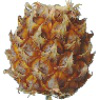

In [ ]:
img

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/TEST_SET/PINEAPPLE/125_100.jpg",target_size=(64,64))

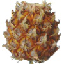

In [ ]:
img

In [ ]:
x=image.img_to_array(img)

In [ ]:
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
x

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [ ]:
pred = model.predict(x) 

1/1 [==============================] - 0s 78ms/step


In [ ]:
pred

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
labels=['APPLES', 'BANANA', 'ORANGE','PINEAPPLE','WATERMELON']
labels[np.argmax(pred)]

'PINEAPPLE'

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/TEST_SET/WATERMELON/125_100.jpg")

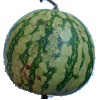

In [ ]:
img

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/TEST_SET/WATERMELON/125_100.jpg",target_size=(64,64))

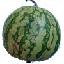

In [ ]:
img

In [ ]:
x=image.img_to_array(img)

In [ ]:
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
x

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [ ]:
pred = model.predict(x) 

1/1 [==============================] - 0s 22ms/step


In [ ]:
pred

array([[0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
labels=['APPLES', 'BANANA', 'ORANGE','PINEAPPLE','WATERMELON']
labels[np.argmax(pred)]

'WATERMELON'